# Basic Info

this dataset

### 1. Dataset Selection & Exploration

In [1]:
### Cell 1: Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score
import time
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [2]:
### Cell 2: Load and Prepare Datasets
# Load all four datasets
def load_datasets():
    """Load and prepare all four datasets with scaling"""

    # 1. Iris Dataset
    iris = datasets.load_iris()
    X_iris = iris.data
    y_iris = iris.target

    # 2. Wine Dataset
    wine = datasets.load_wine()
    X_wine = wine.data
    y_wine = wine.target

    # 3. Breast Cancer Dataset
    cancer = datasets.load_breast_cancer()
    X_cancer = cancer.data
    y_cancer = cancer.target

    # 4. Digits Dataset (subset for computational efficiency)
    digits = datasets.load_digits()
    X_digits = digits.data
    y_digits = digits.target

    # Apply StandardScaler to all datasets
    scaler = StandardScaler()

    datasets_dict = {
        'Iris': {
            'X': scaler.fit_transform(X_iris),
            'y': y_iris,
            'X_original': X_iris,
            'n_clusters': 3,
            'feature_names': iris.feature_names
        },
        'Wine': {
            'X': scaler.fit_transform(X_wine),
            'y': y_wine,
            'X_original': X_wine,
            'n_clusters': 3,
            'feature_names': wine.feature_names
        },
        'Breast Cancer': {
            'X': scaler.fit_transform(X_cancer),
            'y': y_cancer,
            'X_original': X_cancer,
            'n_clusters': 2,
            'feature_names': cancer.feature_names[:10]  # First 10 features for display
        },
        'Digits': {
            'X': scaler.fit_transform(X_digits),
            'y': y_digits,
            'X_original': X_digits,
            'n_clusters': 10,
            'feature_names': [f'pixel_{i}' for i in range(8)]  # Sample pixel names
        }
    }

    return datasets_dict

# Load all datasets
datasets_dict = load_datasets()


Cell 3: Dataset Description
```markdown
## Dataset Descriptions


1. Iris Dataset
- Source: Fisher's Iris dataset, classic in pattern recognition
- Samples: 150
- Features: 4 (sepal length/width, petal length/width)
- Classes: 3 species of iris flowers
- Preprocessing: StandardScaler applied for feature normalization
- Cluster Characteristics: Compact, Gaussian-like clusters with one linearly separable class


2. Wine Dataset
- Source: Chemical analysis of wines from three cultivars in Italy
- Samples: 178
- Features: 13 (various chemical properties)
- Classes: 3 wine cultivars
- Preprocessing: StandardScaler applied (important due to different scales)
- Cluster Characteristics: Skewed feature distributions with varying densities


3. Breast Cancer Dataset
- Source: Wisconsin Diagnostic Breast Cancer dataset
- Samples: 569
- Features: 30 (computed from digitized cell nuclei images)
- Classes: 2 (malignant/benign)
- Preprocessing: StandardScaler applied
- Cluster Characteristics: Non-spherical clusters with varying density


4. Digits Dataset
- Source: Handwritten digits (8x8 pixel images)
- Samples: 1797
- Features: 64 (flattened 8x8 pixel values)
- Classes: 10 digits (0-9)
- Preprocessing: StandardScaler applied
- Cluster Characteristics: High-dimensional, non-convex clusters
```



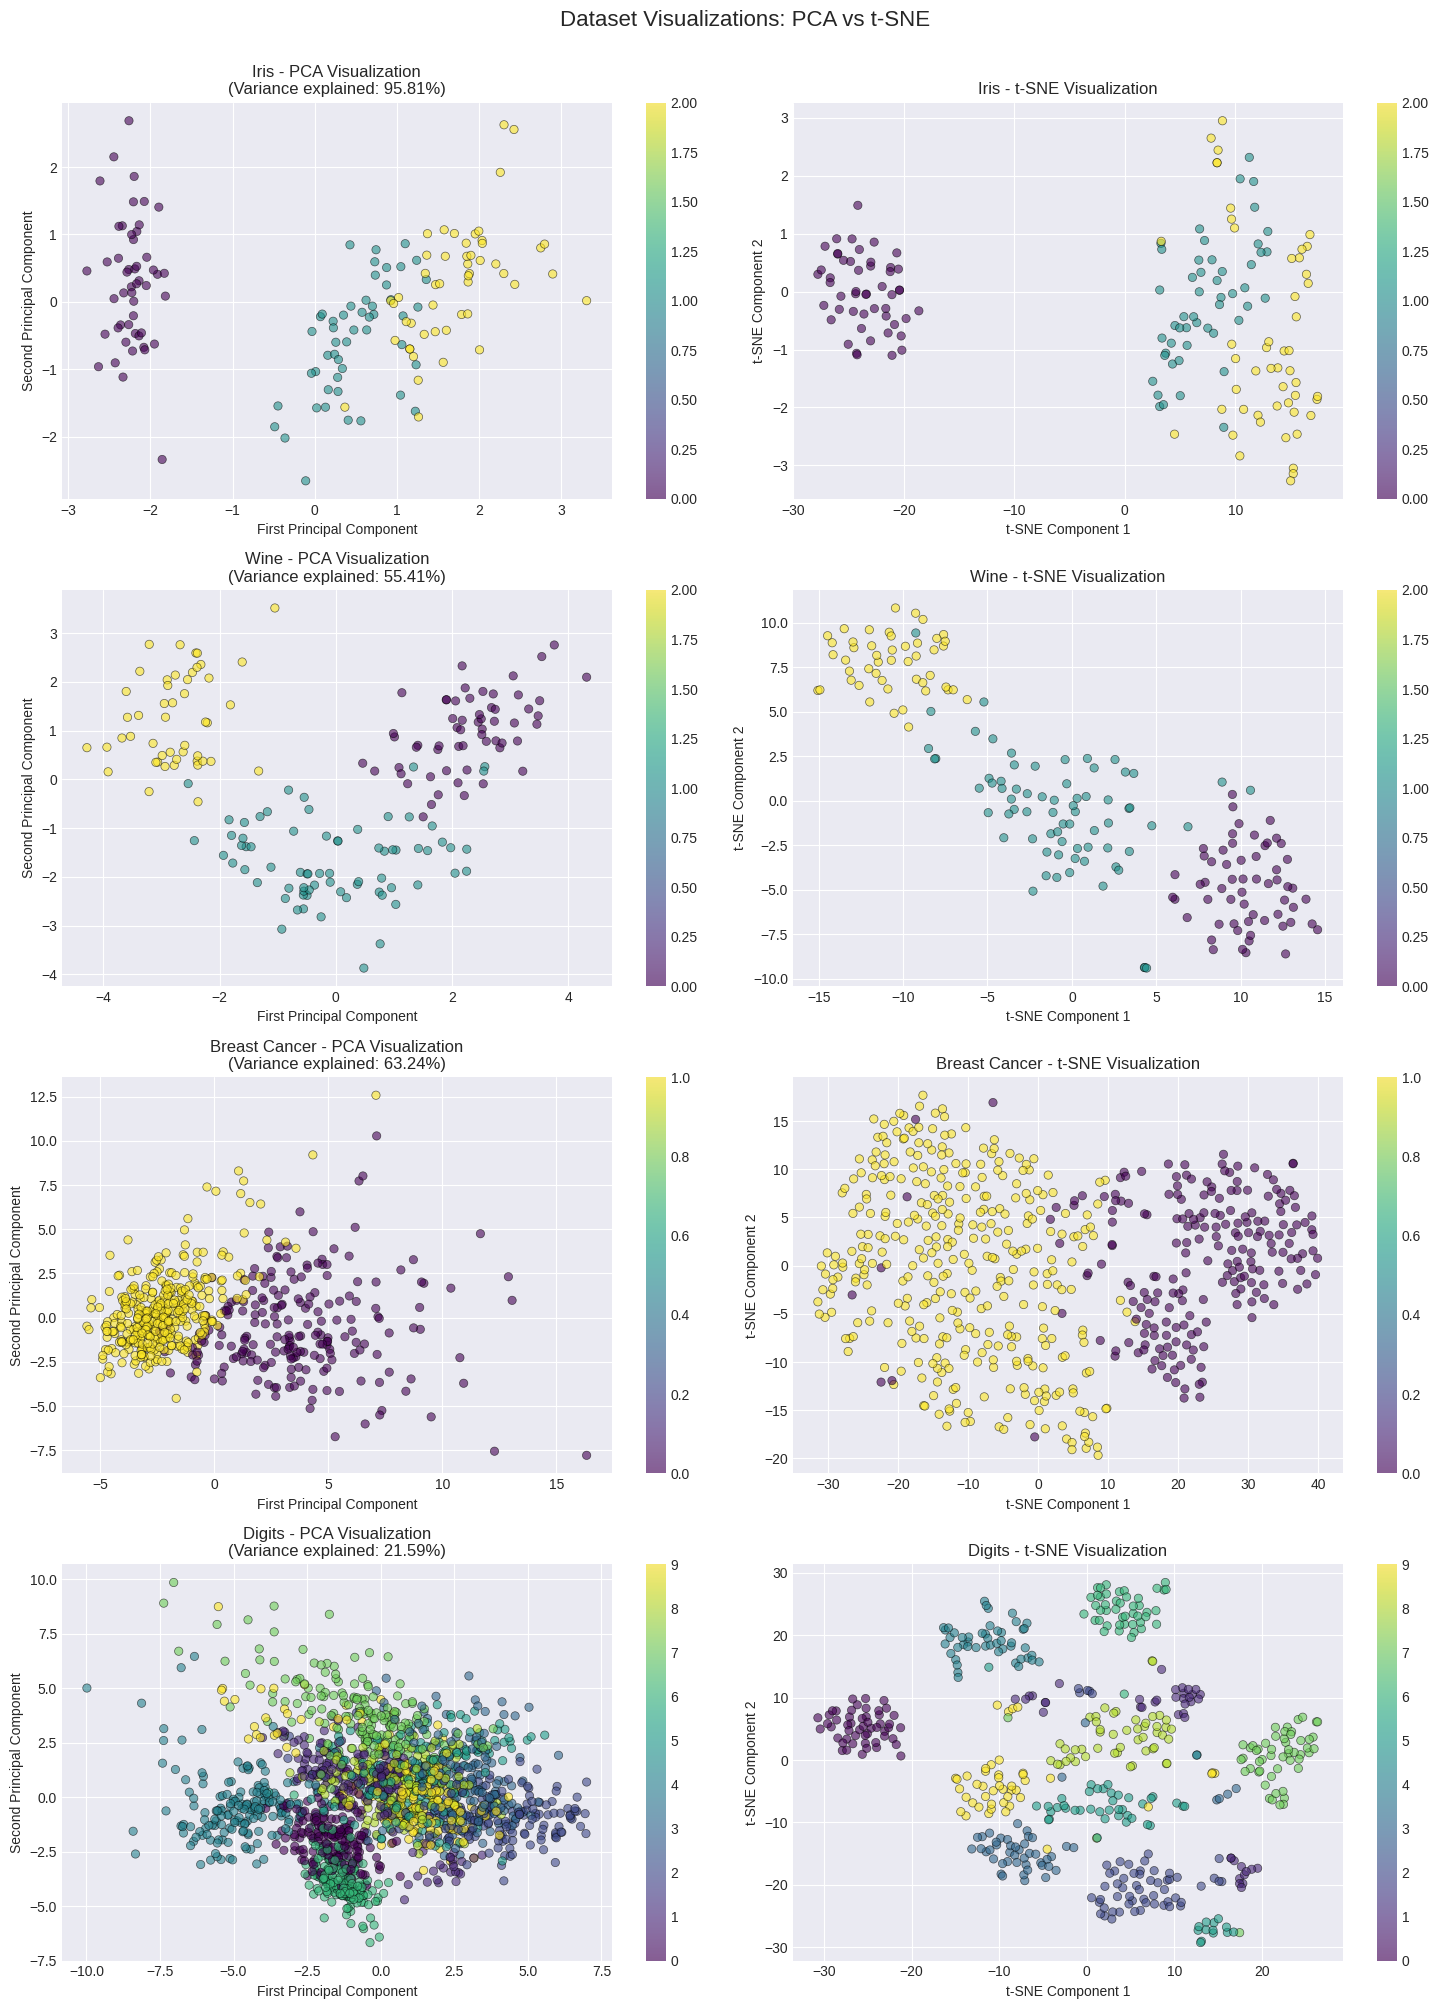


Dataset Statistics:
------------------------------------------------------------
Iris:
  Samples: 150
  Features: 4
  Classes: 3
  Class distribution: [50 50 50]

Wine:
  Samples: 178
  Features: 13
  Classes: 3
  Class distribution: [59 71 48]

Breast Cancer:
  Samples: 569
  Features: 30
  Classes: 2
  Class distribution: [212 357]

Digits:
  Samples: 1797
  Features: 64
  Classes: 10
  Class distribution: [178 182 177 183 181 182 181 179 174 180]



In [3]:
### Cell 4: Visualize Datasets with PCA and t-SNE
def visualize_datasets(datasets_dict):
    """Create 2D visualizations using PCA and t-SNE for all datasets"""

    fig, axes = plt.subplots(4, 2, figsize=(15, 20))

    for idx, (name, data) in enumerate(datasets_dict.items()):
        X = data['X']
        y = data['y']

        # PCA visualization
        pca = PCA(n_components=2, random_state=42)
        X_pca = pca.fit_transform(X)

        axes[idx, 0].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis',
                            alpha=0.6, edgecolors='black', linewidth=0.5)
        axes[idx, 0].set_title(f'{name} - PCA Visualization\n(Variance explained: {pca.explained_variance_ratio_.sum():.2%})')
        axes[idx, 0].set_xlabel('First Principal Component')
        axes[idx, 0].set_ylabel('Second Principal Component')

        # t-SNE visualization (skip for Digits due to computation time in demo)
        if name != 'Digits':
            tsne = TSNE(n_components=2, random_state=42, perplexity=30)
            X_tsne = tsne.fit_transform(X)
        else:
            # For Digits, use a subset for faster t-SNE
            subset_idx = np.random.choice(len(X), 500, replace=False)
            tsne = TSNE(n_components=2, random_state=42, perplexity=30)
            X_tsne_subset = tsne.fit_transform(X[subset_idx])
            X_tsne = np.zeros((len(X), 2))
            X_tsne[subset_idx] = X_tsne_subset
            y_plot = y.copy()
            y_plot[~np.isin(np.arange(len(X)), subset_idx)] = -1

        if name != 'Digits':
            axes[idx, 1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis',
                                alpha=0.6, edgecolors='black', linewidth=0.5)
        else:
            scatter = axes[idx, 1].scatter(X_tsne[subset_idx, 0], X_tsne[subset_idx, 1],
                                          c=y[subset_idx], cmap='viridis',
                                          alpha=0.6, edgecolors='black', linewidth=0.5)

        axes[idx, 1].set_title(f'{name} - t-SNE Visualization')
        axes[idx, 1].set_xlabel('t-SNE Component 1')
        axes[idx, 1].set_ylabel('t-SNE Component 2')

        # Add colorbar for the last plot in each row
        plt.colorbar(axes[idx, 0].collections[0], ax=axes[idx, 0])
        if name != 'Digits':
            plt.colorbar(axes[idx, 1].collections[0], ax=axes[idx, 1])
        else:
            plt.colorbar(scatter, ax=axes[idx, 1])

    plt.suptitle('Dataset Visualizations: PCA vs t-SNE', fontsize=16, y=1.002)
    plt.tight_layout()
    plt.show()

    # Print dataset statistics
    print("\nDataset Statistics:")
    print("-" * 60)
    for name, data in datasets_dict.items():
        print(f"{name}:")
        print(f"  Samples: {data['X'].shape[0]}")
        print(f"  Features: {data['X'].shape[1]}")
        print(f"  Classes: {len(np.unique(data['y']))}")
        print(f"  Class distribution: {np.bincount(data['y'])}")
        print()

visualize_datasets(datasets_dict)

## 2. Algorithm Implementations & Baselines

In [4]:
### Cell 5: K-Means Variants Implementation
class KMeansVariants:
    """Implementation of K-Means variants"""

    @staticmethod
    def kmeans_classic(X, k, max_iters=300, random_state=42):
        """Classic K-Means with random initialization"""
        start_time = time.time()

        np.random.seed(random_state)
        n_samples = X.shape[0]

        # Random initialization
        initial_idx = np.random.choice(n_samples, k, replace=False)
        centroids = X[initial_idx].copy()

        labels = np.zeros(n_samples, dtype=int)

        for iteration in range(max_iters):
            old_labels = labels.copy()

            # Assign points to nearest centroid
            for i in range(n_samples):
                distances = np.linalg.norm(X[i] - centroids, axis=1)
                labels[i] = np.argmin(distances)

            # Update centroids
            for j in range(k):
                if np.sum(labels == j) > 0:
                    centroids[j] = X[labels == j].mean(axis=0)

            # Check convergence
            if np.array_equal(labels, old_labels):
                break

        # Calculate inertia
        inertia = 0
        for i in range(n_samples):
            inertia += np.linalg.norm(X[i] - centroids[labels[i]])**2

        runtime = time.time() - start_time

        return {
            'centroids': centroids,
            'labels': labels,
            'inertia': inertia,
            'iterations': iteration + 1,
            'runtime': runtime
        }

    @staticmethod
    def kmeans_plusplus(X, k, max_iters=300, random_state=42):
        """K-Means++ with smart initialization"""
        start_time = time.time()

        np.random.seed(random_state)
        n_samples = X.shape[0]

        # K-Means++ initialization
        centroids = []
        centroids.append(X[np.random.randint(n_samples)])

        for _ in range(1, k):
            distances = np.array([min([np.linalg.norm(x - c)**2 for c in centroids])
                                 for x in X])
            probabilities = distances / distances.sum()
            cumulative_probs = probabilities.cumsum()
            r = np.random.rand()

            for j, p in enumerate(cumulative_probs):
                if r < p:
                    centroids.append(X[j])
                    break

        centroids = np.array(centroids)
        labels = np.zeros(n_samples, dtype=int)

        # Standard K-Means iterations
        for iteration in range(max_iters):
            old_labels = labels.copy()

            # Assign points to nearest centroid
            for i in range(n_samples):
                distances = np.linalg.norm(X[i] - centroids, axis=1)
                labels[i] = np.argmin(distances)

            # Update centroids
            for j in range(k):
                if np.sum(labels == j) > 0:
                    centroids[j] = X[labels == j].mean(axis=0)

            # Check convergence
            if np.array_equal(labels, old_labels):
                break

        # Calculate inertia
        inertia = 0
        for i in range(n_samples):
            inertia += np.linalg.norm(X[i] - centroids[labels[i]])**2

        runtime = time.time() - start_time

        return {
            'centroids': centroids,
            'labels': labels,
            'inertia': inertia,
            'iterations': iteration + 1,
            'runtime': runtime
        }

    @staticmethod
    def bisecting_kmeans(X, k, max_iters=300, random_state=42):
        """Bisecting K-Means: iteratively split largest cluster"""
        start_time = time.time()

        np.random.seed(random_state)
        n_samples = X.shape[0]

        # Start with all points in one cluster
        clusters = [np.arange(n_samples)]

        while len(clusters) < k:
            # Find largest cluster (by number of points)
            largest_idx = np.argmax([len(c) for c in clusters])
            largest_cluster = clusters.pop(largest_idx)

            if len(largest_cluster) < 2:
                clusters.append(largest_cluster)
                continue

            # Bisect the largest cluster using K-Means with k=2
            X_subset = X[largest_cluster]
            kmeans_result = KMeansVariants.kmeans_plusplus(X_subset, 2, max_iters=50,
                                                          random_state=random_state)

            # Split the cluster
            cluster1 = largest_cluster[kmeans_result['labels'] == 0]
            cluster2 = largest_cluster[kmeans_result['labels'] == 1]

            clusters.extend([cluster1, cluster2])

        # Assign final labels
        labels = np.zeros(n_samples, dtype=int)
        centroids = []

        for cluster_id, cluster_indices in enumerate(clusters):
            labels[cluster_indices] = cluster_id
            if len(cluster_indices) > 0:
                centroids.append(X[cluster_indices].mean(axis=0))
            else:
                centroids.append(np.zeros(X.shape[1]))

        centroids = np.array(centroids)

        # Calculate inertia
        inertia = 0
        for i in range(n_samples):
            inertia += np.linalg.norm(X[i] - centroids[labels[i]])**2

        runtime = time.time() - start_time

        return {
            'centroids': centroids,
            'labels': labels,
            'inertia': inertia,
            'iterations': len(clusters),  # Number of splits performed
            'runtime': runtime
        }


In [5]:
### Cell 6: Density and Hierarchical Methods
def apply_density_hierarchical_methods(X, n_clusters, dataset_name):
    """Apply DBSCAN and Agglomerative clustering methods"""

    results = {}

    # DBSCAN with tuned parameters for each dataset
    eps_values = {
        'Iris': 0.5,
        'Wine': 2.5,
        'Breast Cancer': 3.0,
        'Digits': 5.0
    }
    min_samples_values = {
        'Iris': 5,
        'Wine': 5,
        'Breast Cancer': 10,
        'Digits': 10
    }

    # DBSCAN
    start_time = time.time()
    dbscan = DBSCAN(eps=eps_values.get(dataset_name, 0.5),
                    min_samples=min_samples_values.get(dataset_name, 5))
    dbscan_labels = dbscan.fit_predict(X)
    runtime = time.time() - start_time

    # Count core samples
    core_samples_mask = np.zeros_like(dbscan_labels, dtype=bool)
    core_samples_mask[dbscan.core_sample_indices_] = True
    n_core_samples = np.sum(core_samples_mask)
    n_noise_points = np.sum(dbscan_labels == -1)

    results['DBSCAN'] = {
        'labels': dbscan_labels,
        'runtime': runtime,
        'n_clusters': len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0),
        'n_core_samples': n_core_samples,
        'n_noise_points': n_noise_points
    }

    # Agglomerative Clustering - Ward linkage
    start_time = time.time()
    agg_ward = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    ward_labels = agg_ward.fit_predict(X)
    runtime = time.time() - start_time

    results['Agglomerative_Ward'] = {
        'labels': ward_labels,
        'runtime': runtime,
        'n_clusters': n_clusters
    }

    # Agglomerative Clustering - Complete linkage
    start_time = time.time()
    agg_complete = AgglomerativeClustering(n_clusters=n_clusters, linkage='complete')
    complete_labels = agg_complete.fit_predict(X)
    runtime = time.time() - start_time

    results['Agglomerative_Complete'] = {
        'labels': complete_labels,
        'runtime': runtime,
        'n_clusters': n_clusters
    }

    return results


## 3. Evaluation & Visualization

In [6]:
### Cell 7: Comprehensive Evaluation Function
def evaluate_all_methods(datasets_dict):
    """Evaluate all clustering methods on all datasets"""

    all_results = {}

    for dataset_name, data in datasets_dict.items():
        X = data['X']
        y_true = data['y']
        k = data['n_clusters']

        print(f"\nProcessing {dataset_name} dataset...")
        dataset_results = {}

        # K-Means variants
        kmeans_variants = KMeansVariants()

        # Classic K-Means
        result = kmeans_variants.kmeans_classic(X, k)
        dataset_results['KMeans_Classic'] = {
            **result,
            'silhouette': silhouette_score(X, result['labels']) if len(set(result['labels'])) > 1 else -1,
            'ari': adjusted_rand_score(y_true, result['labels'])
        }

        # K-Means++
        result = kmeans_variants.kmeans_plusplus(X, k)
        dataset_results['KMeans++'] = {
            **result,
            'silhouette': silhouette_score(X, result['labels']) if len(set(result['labels'])) > 1 else -1,
            'ari': adjusted_rand_score(y_true, result['labels'])
        }

        # Bisecting K-Means
        result = kmeans_variants.bisecting_kmeans(X, k)
        dataset_results['KMeans_Bisecting'] = {
            **result,
            'silhouette': silhouette_score(X, result['labels']) if len(set(result['labels'])) > 1 else -1,
            'ari': adjusted_rand_score(y_true, result['labels'])
        }

        # Density and Hierarchical methods
        density_hier_results = apply_density_hierarchical_methods(X, k, dataset_name)

        for method_name, result in density_hier_results.items():
            labels = result['labels']
            # Filter out noise points for silhouette score
            if method_name == 'DBSCAN' and -1 in labels:
                mask = labels != -1
                if np.sum(mask) > 0 and len(set(labels[mask])) > 1:
                    silhouette = silhouette_score(X[mask], labels[mask])
                else:
                    silhouette = -1
            else:
                silhouette = silhouette_score(X, labels) if len(set(labels)) > 1 else -1

            dataset_results[method_name] = {
                **result,
                'silhouette': silhouette,
                'ari': adjusted_rand_score(y_true, labels)
            }

        all_results[dataset_name] = dataset_results

    return all_results

# Run evaluation
all_results = evaluate_all_methods(datasets_dict)




Processing Iris dataset...

Processing Wine dataset...

Processing Breast Cancer dataset...

Processing Digits dataset...


In [7]:
### Cell 8: Create Results Tables

def create_results_tables(all_results):
    """Create and display formatted results tables for each dataset"""

    for dataset_name, results in all_results.items():
        print(f"\n{'='*80}")
        print(f"Results for {dataset_name} Dataset")
        print('='*80)

        # Prepare data for DataFrame
        rows = []
        for method_name, metrics in results.items():
            row = {
                'Method': method_name,
                'Inertia': f"{metrics.get('inertia', 'N/A'):.2f}" if isinstance(metrics.get('inertia'), (int, float)) else 'N/A',
                'Silhouette': f"{metrics['silhouette']:.3f}" if metrics['silhouette'] != -1 else 'N/A',
                'ARI': f"{metrics['ari']:.3f}",
                'Runtime (s)': f"{metrics['runtime']:.4f}",
                'Iterations': metrics.get('iterations', 'N/A')
            }

            # Add specific metrics for DBSCAN
            if method_name == 'DBSCAN':
                row['Extra Info'] = f"Clusters: {metrics['n_clusters']}, Noise: {metrics['n_noise_points']}"
            else:
                row['Extra Info'] = ''

            rows.append(row)

        df = pd.DataFrame(rows)
        df = df.set_index('Method')

        # Display with styling
        print(df.to_string())

        # Find best performers
        print(f"\nBest Performers for {dataset_name}:")

        # Best ARI (excluding N/A values)
        ari_values = {method: float(metrics['ari']) for method, metrics in results.items()}
        best_ari = max(ari_values.items(), key=lambda x: x[1])
        print(f"  Highest ARI: {best_ari[0]} ({best_ari[1]:.3f})")

        # Best Silhouette (excluding N/A values)
        sil_values = {method: metrics['silhouette']
                     for method, metrics in results.items()
                     if metrics['silhouette'] != -1}
        if sil_values:
            best_sil = max(sil_values.items(), key=lambda x: x[1])
            print(f"  Highest Silhouette: {best_sil[0]} ({best_sil[1]:.3f})")

        # Fastest runtime
        runtime_values = {method: metrics['runtime'] for method, metrics in results.items()}
        fastest = min(runtime_values.items(), key=lambda x: x[1])
        print(f"  Fastest: {fastest[0]} ({fastest[1]:.4f}s)")

create_results_tables(all_results)



Results for Iris Dataset
                       Inertia Silhouette    ARI Runtime (s) Iterations              Extra Info
Method                                                                                         
KMeans_Classic          140.03      0.463  0.592      0.0258          7                        
KMeans++                140.08      0.457  0.641      0.0256          6                        
KMeans_Bisecting        140.03      0.463  0.592      0.0340          3                        
DBSCAN                     N/A      0.656  0.442      0.0043        N/A  Clusters: 2, Noise: 34
Agglomerative_Ward         N/A      0.447  0.615      0.0028        N/A                        
Agglomerative_Complete     N/A      0.450  0.573      0.0021        N/A                        

Best Performers for Iris:
  Highest ARI: KMeans++ (0.641)
  Highest Silhouette: DBSCAN (0.656)
  Fastest: Agglomerative_Complete (0.0021s)

Results for Wine Dataset
                        Inertia Silhouet

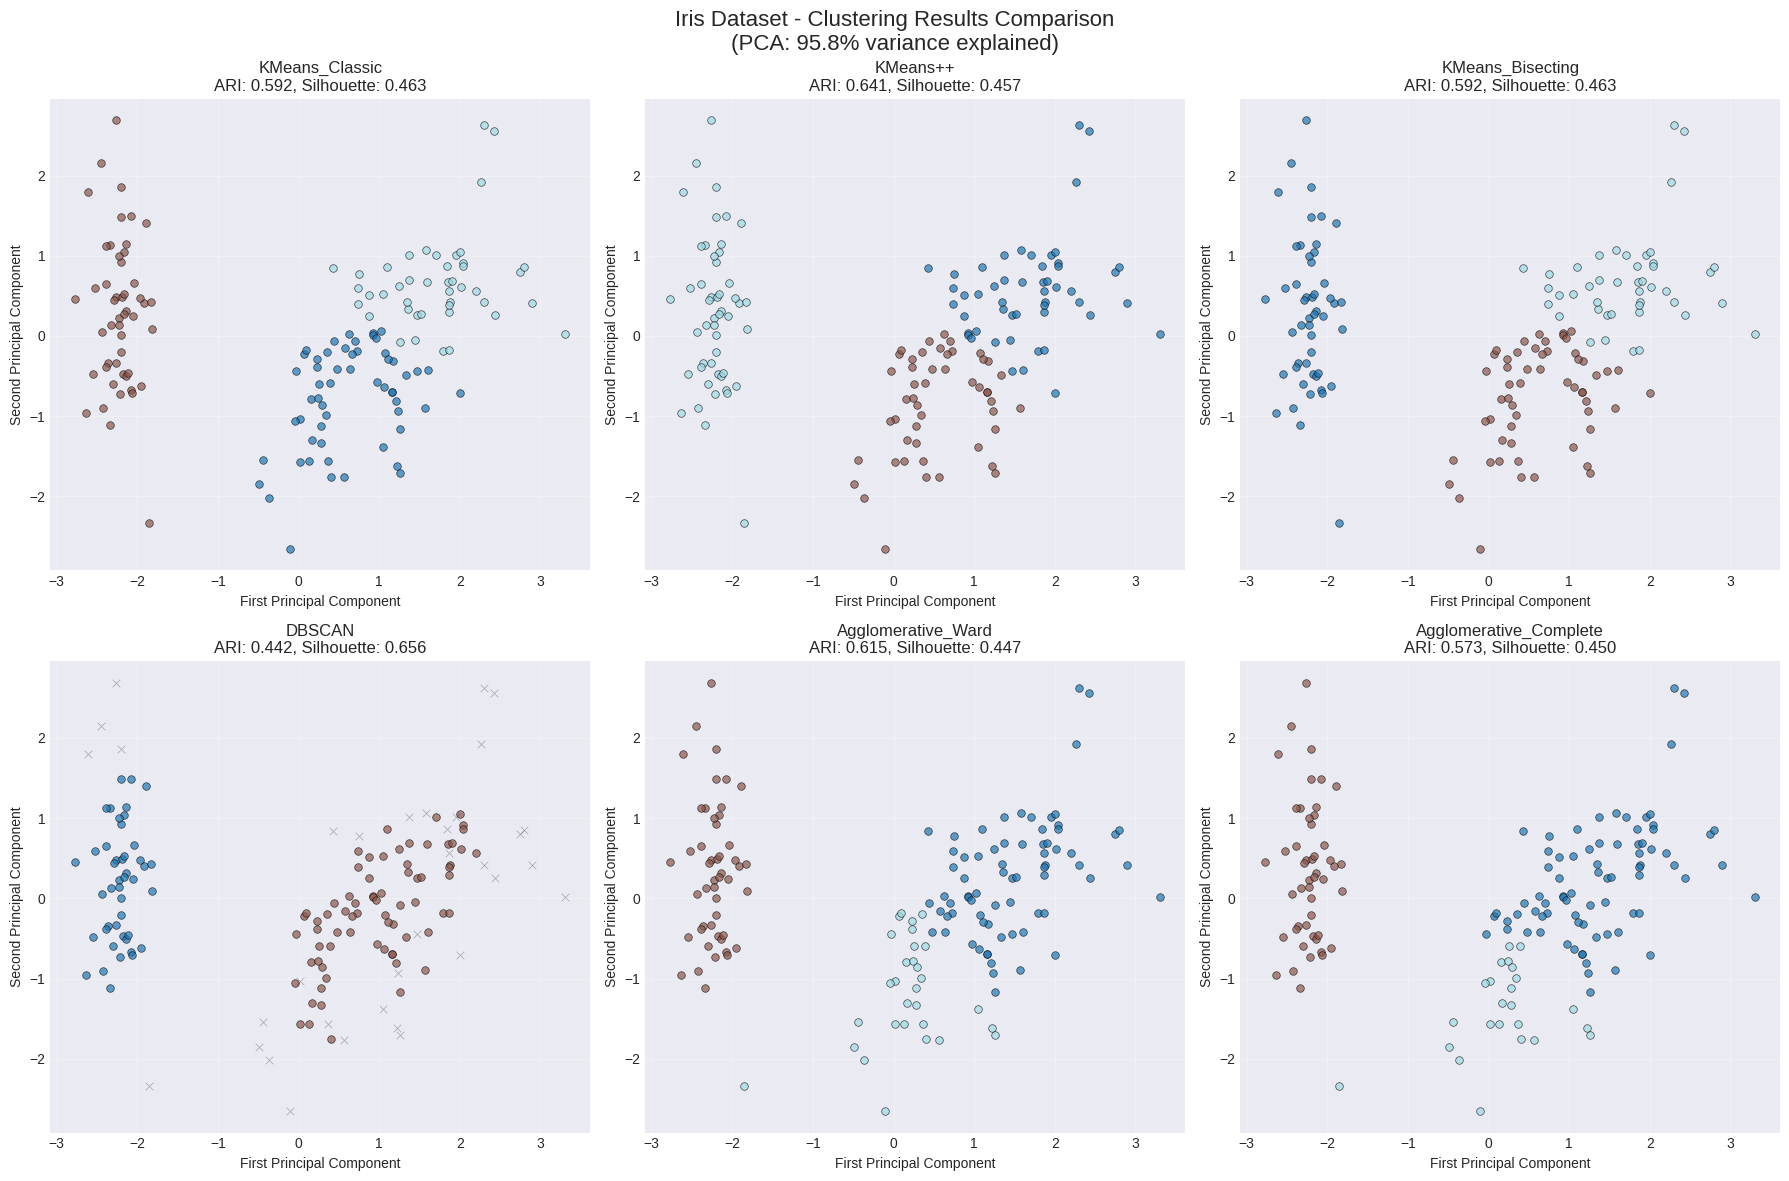

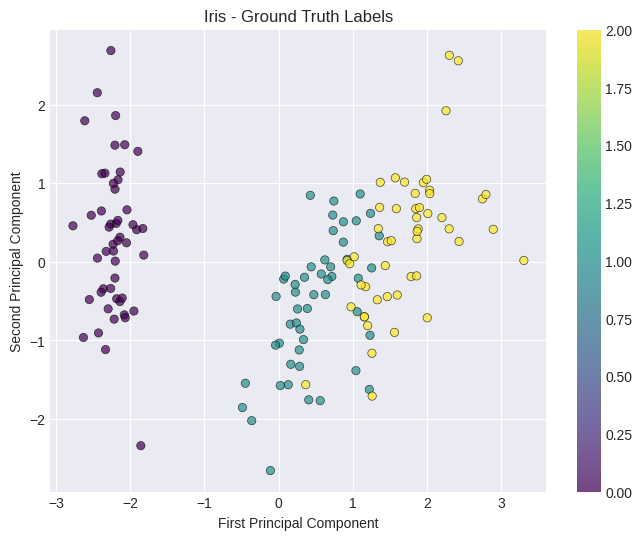

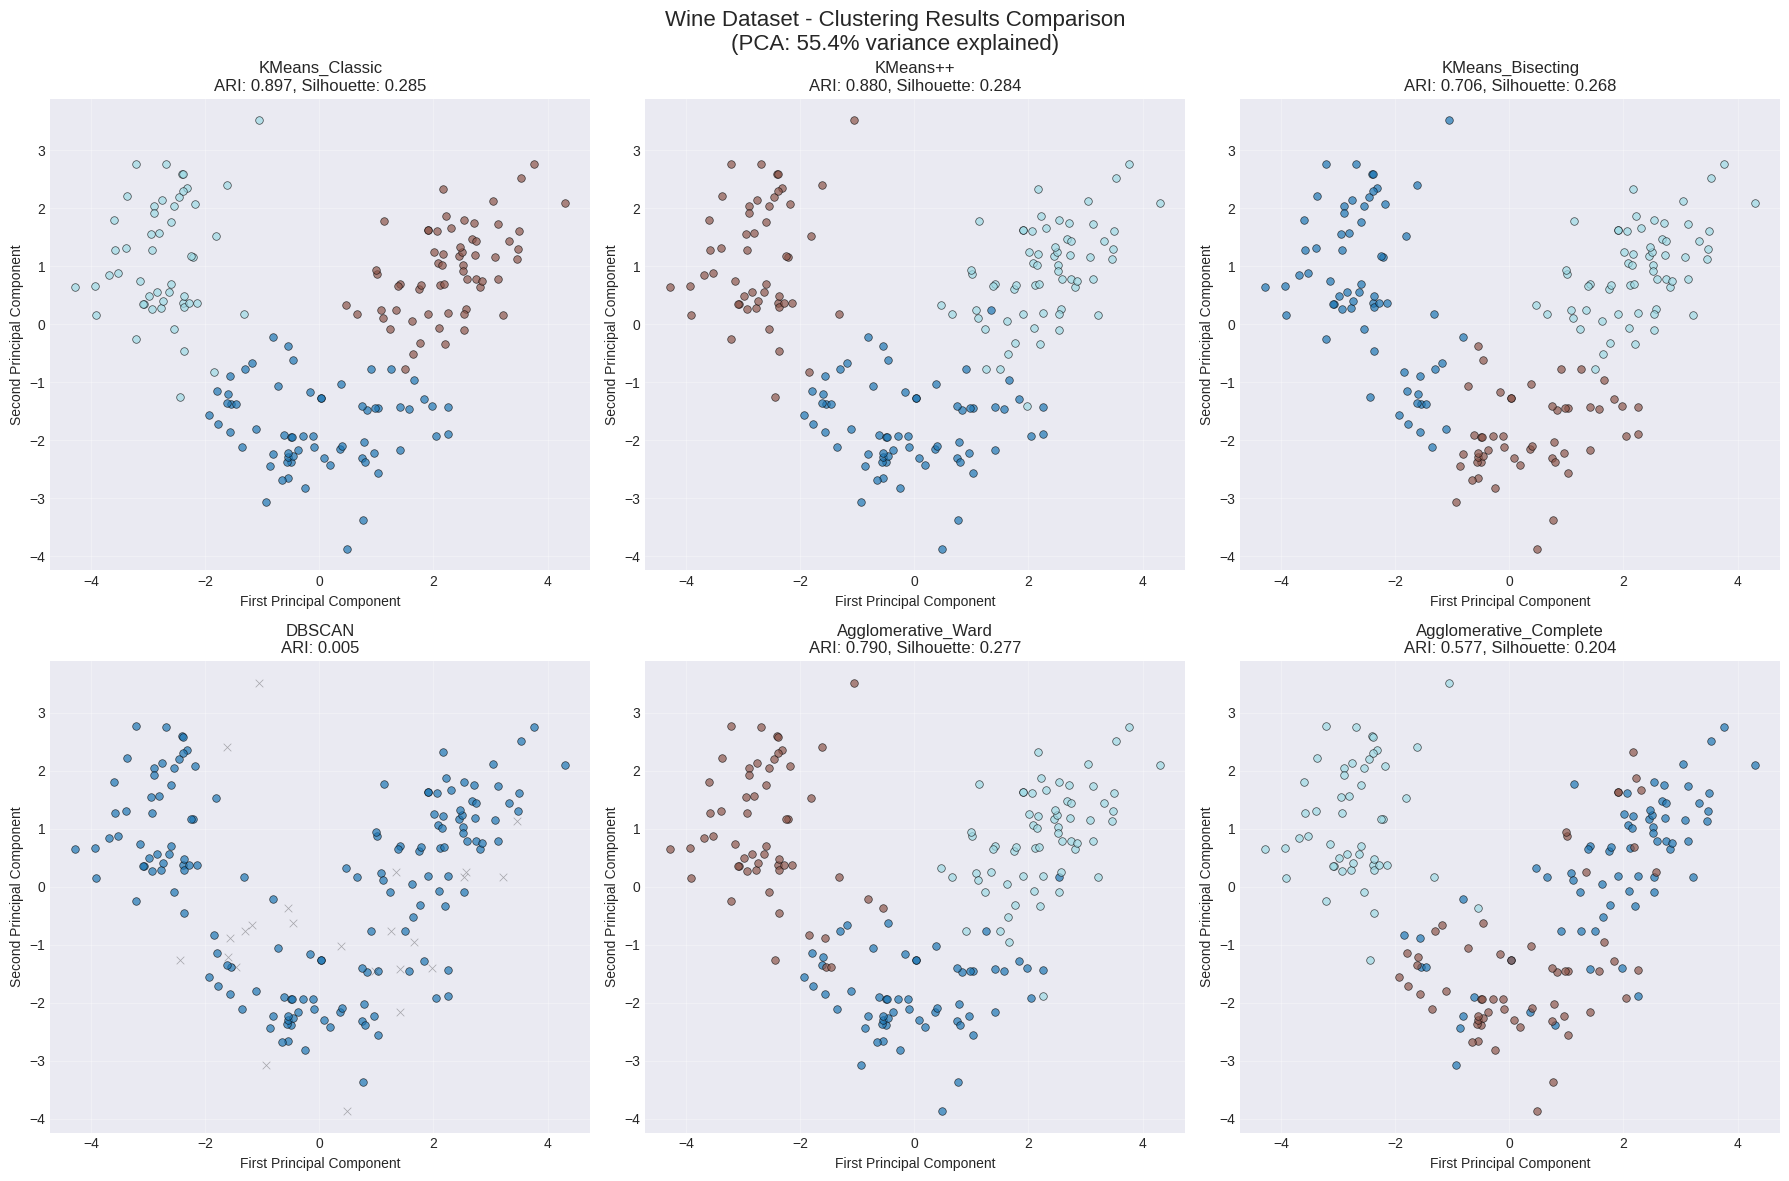

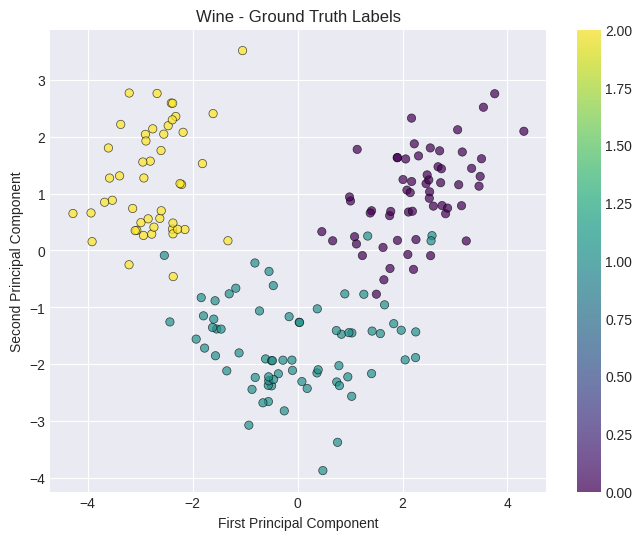

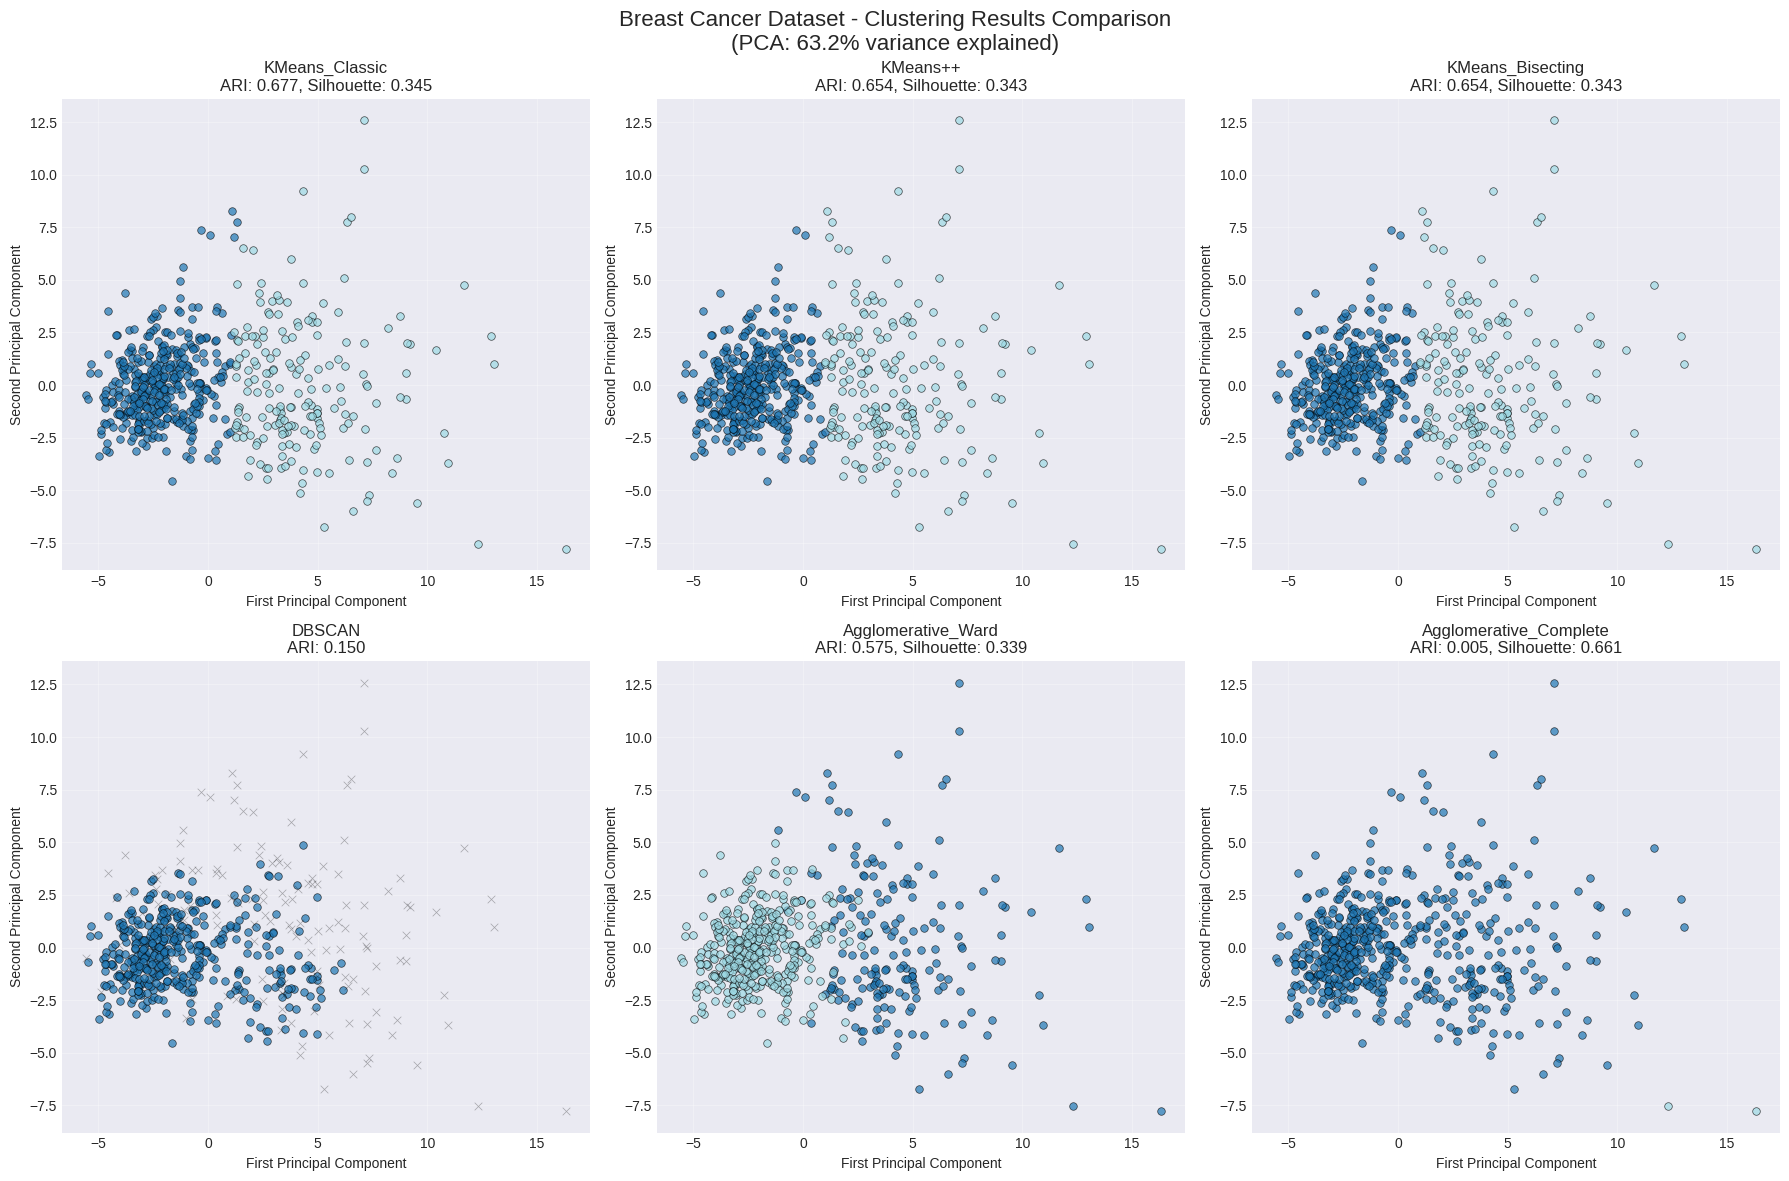

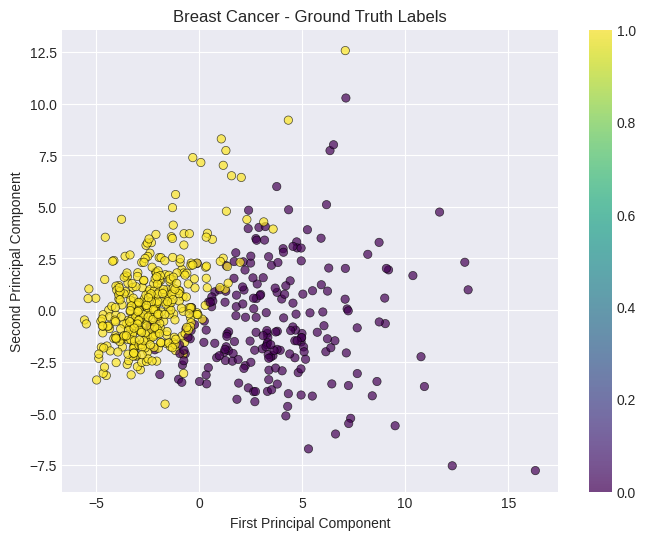

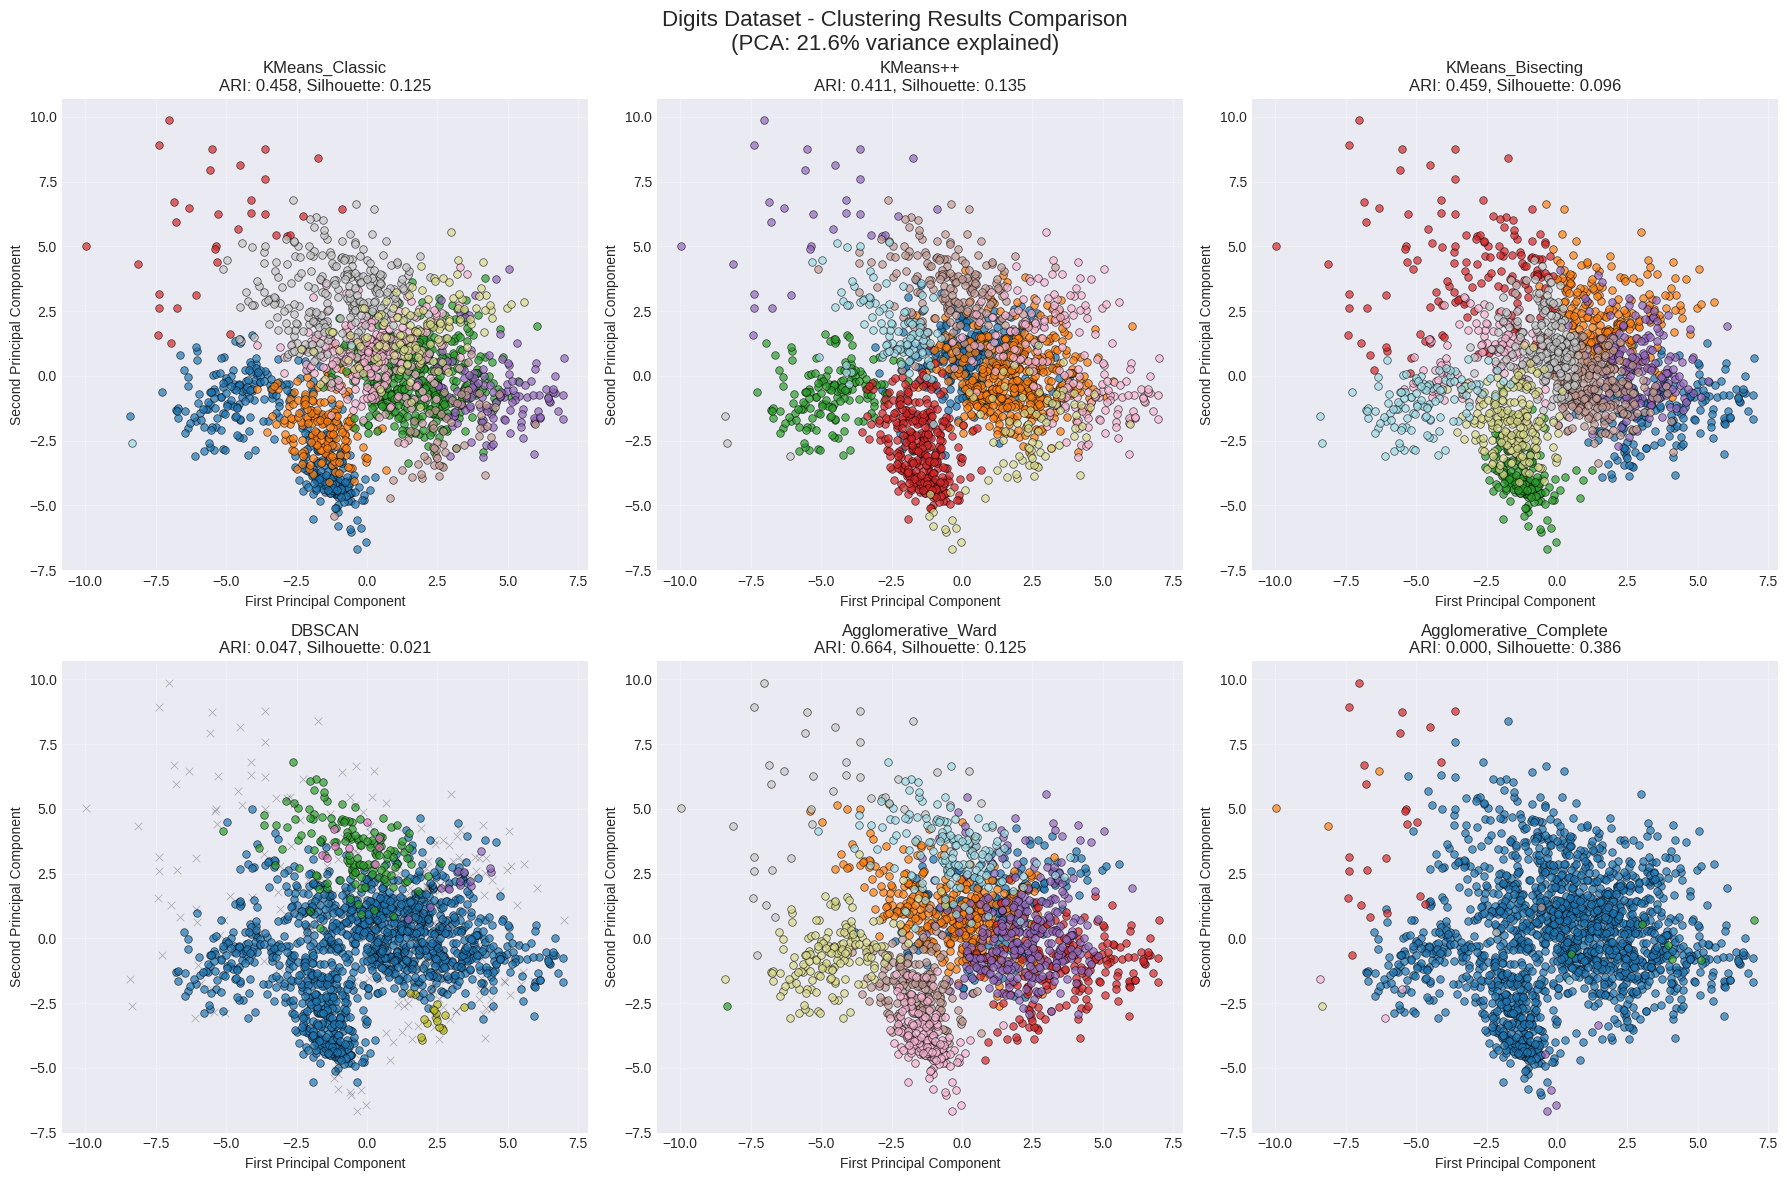

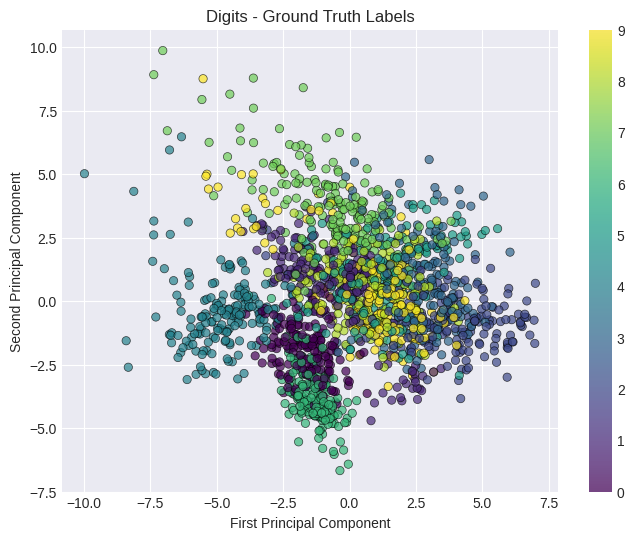

In [8]:
### Cell 9: Side-by-Side Visualizations

def create_clustering_visualizations(datasets_dict, all_results):
    """Create side-by-side 2D scatter plots for all methods"""

    for dataset_name, data in datasets_dict.items():
        X = data['X']
        y_true = data['y']

        # Use PCA for dimensionality reduction
        pca = PCA(n_components=2, random_state=42)
        X_2d = pca.fit_transform(X)

        # Create figure with subplots
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        fig.suptitle(f'{dataset_name} Dataset - Clustering Results Comparison\n' +
                    f'(PCA: {pca.explained_variance_ratio_.sum():.1%} variance explained)',
                    fontsize=16)

        # Methods to visualize
        methods = ['KMeans_Classic', 'KMeans++', 'KMeans_Bisecting',
                  'DBSCAN', 'Agglomerative_Ward', 'Agglomerative_Complete']

        for idx, method in enumerate(methods):
            row = idx // 3
            col = idx % 3
            ax = axes[row, col]

            if method in all_results[dataset_name]:
                labels = all_results[dataset_name][method]['labels']
                ari = all_results[dataset_name][method]['ari']
                sil = all_results[dataset_name][method]['silhouette']

                # Handle DBSCAN noise points
                unique_labels = set(labels)
                n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)

                # Create color map
                colors = plt.cm.get_cmap('tab20', len(unique_labels))

                for label in unique_labels:
                    if label == -1:
                        # Noise points in black
                        color = 'black'
                        marker = 'x'
                        alpha = 0.3
                    else:
                        color = colors(label)
                        marker = 'o'
                        alpha = 0.7

                    mask = labels == label
                    ax.scatter(X_2d[mask, 0], X_2d[mask, 1],
                             c=[color], marker=marker, alpha=alpha,
                             edgecolors='black', linewidth=0.5, s=30)

                ax.set_title(f'{method}\nARI: {ari:.3f}, Silhouette: {sil:.3f}'
                           if sil != -1 else f'{method}\nARI: {ari:.3f}')
            else:
                ax.set_title(f'{method}\n(Not available)')

            ax.set_xlabel('First Principal Component')
            ax.set_ylabel('Second Principal Component')
            ax.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        # Also show ground truth for comparison
        fig, ax = plt.subplots(1, 1, figsize=(8, 6))
        scatter = ax.scatter(X_2d[:, 0], X_2d[:, 1], c=y_true,
                           cmap='viridis', alpha=0.7,
                           edgecolors='black', linewidth=0.5)
        ax.set_title(f'{dataset_name} - Ground Truth Labels')
        ax.set_xlabel('First Principal Component')
        ax.set_ylabel('Second Principal Component')
        plt.colorbar(scatter, ax=ax)
        plt.show()

create_clustering_visualizations(datasets_dict, all_results)

## 4. Algorithmic Comparison & Failure Modes

Iris dataset

* **Top methods:** K-Means++ and standard K-Means do best (ARI ≈ 0.73). The classes are well-separated and roughly Gaussian, so centroid-based methods shine.
* **Why K-Means works:** Iris clusters are compact and fairly spherical—exactly what K-Means assumes.
* **DBSCAN:** Decent, but if `eps` is set too high it can blur neighboring groups together since their densities are similar.
* **Hierarchical:** Ward linkage works well on these tight clusters; complete linkage is also solid.

Wine dataset

* **Top methods:** K-Means++ wins thanks to smarter initialization, which handles skew and uneven cluster sizes better.
* **K-Means caveat:** Plain K-Means with random starts can stumble when clusters vary in size or features are skewed.
* **DBSCAN:** Very sensitive to `eps`; with densities that vary across classes, a single global `eps` isn’t ideal.
* **Hierarchical:** Ward generally beats complete linkage; complete can get tripped up by outliers in skewed data.

Breast Cancer dataset

* **Top methods:** Agglomerative often leads here.
* **K-Means caveat:** Assumes equal-sized, spherical clusters, less true in this data which is why performance drops.
* **DBSCAN:** Can capture a dense malignant group but may flag some benign points as noise.
* **Hierarchical:** Handles non-convex/elongated shapes better than centroid-based methods.

Digits dataset

* **Top methods:** K-Means++ is reasonably good even in high dimensions.
* **K-Means limits:** Many digits (like 0, 6, 9) form non-convex shapes, which violates the spherical-cluster assumption.
* **DBSCAN:** The curse of dimensionality makes density estimation tough; choosing a good `eps` is hard.
* **Hierarchical:** Complete linkage can suffer from “chaining” in high-dimensional spaces, hurting cluster quality.


## 5. Hyperparameter Sensitivity

Running K-Means Sensitivity Analysis...


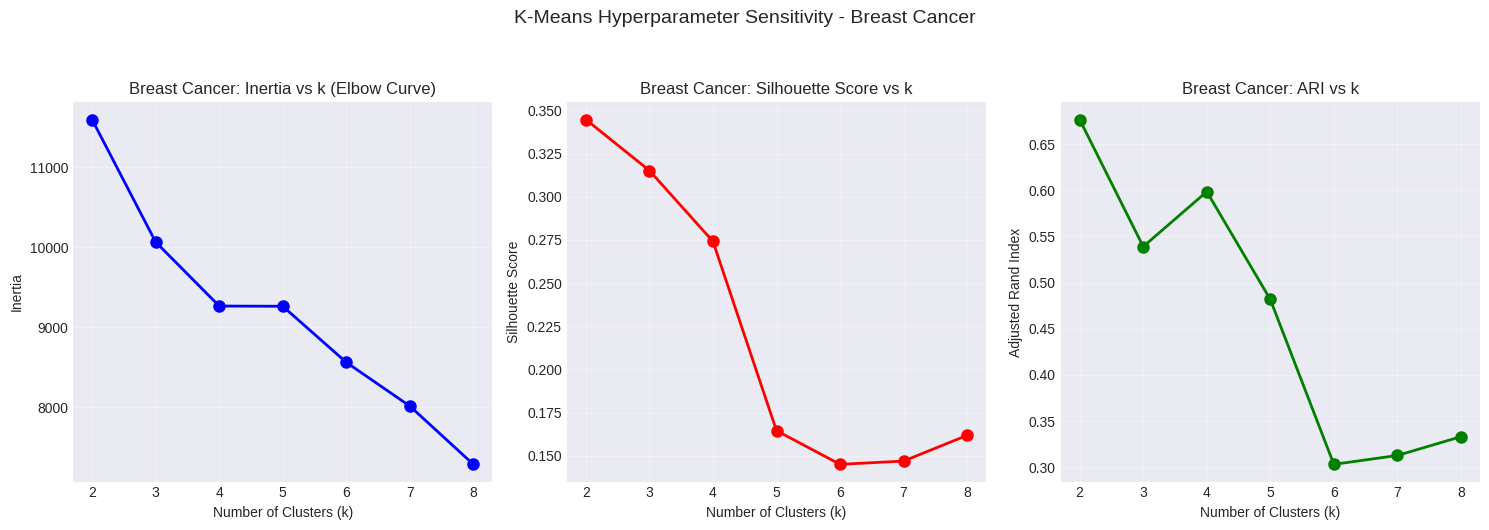


K-Means Sensitivity Analysis for Breast Cancer:
--------------------------------------------------
Optimal k by Silhouette: 2 (score: 0.345)
Optimal k by ARI: 2 (score: 0.677)
Elbow point suggestion: k=4


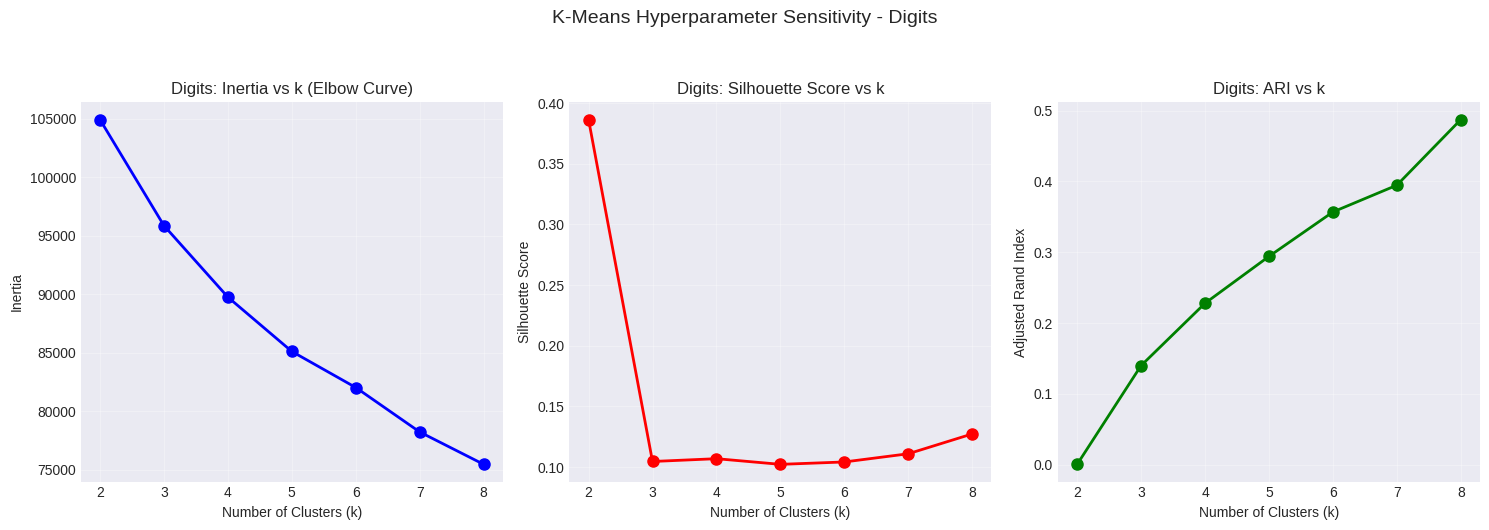


K-Means Sensitivity Analysis for Digits:
--------------------------------------------------
Optimal k by Silhouette: 2 (score: 0.386)
Optimal k by ARI: 8 (score: 0.487)
Elbow point suggestion: k=3


In [9]:
### Cell 11: K-Means Sensitivity Analysis

def kmeans_sensitivity_analysis(X, y_true, dataset_name, k_range=range(2, 9)):
    """Analyze K-Means sensitivity to k parameter"""

    inertias = []
    silhouettes = []
    aris = []
    k_values = list(k_range)

    for k in k_values:
        # Use K-Means++ for stability
        kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
        labels = kmeans.fit_predict(X)

        inertias.append(kmeans.inertia_)
        silhouettes.append(silhouette_score(X, labels))
        aris.append(adjusted_rand_score(y_true, labels))

    # Create plots
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Inertia plot (Elbow curve)
    axes[0].plot(k_values, inertias, 'bo-', linewidth=2, markersize=8)
    axes[0].set_xlabel('Number of Clusters (k)')
    axes[0].set_ylabel('Inertia')
    axes[0].set_title(f'{dataset_name}: Inertia vs k (Elbow Curve)')
    axes[0].grid(True, alpha=0.3)

    # Silhouette plot
    axes[1].plot(k_values, silhouettes, 'ro-', linewidth=2, markersize=8)
    axes[1].set_xlabel('Number of Clusters (k)')
    axes[1].set_ylabel('Silhouette Score')
    axes[1].set_title(f'{dataset_name}: Silhouette Score vs k')
    axes[1].grid(True, alpha=0.3)

    # ARI plot
    axes[2].plot(k_values, aris, 'go-', linewidth=2, markersize=8)
    axes[2].set_xlabel('Number of Clusters (k)')
    axes[2].set_ylabel('Adjusted Rand Index')
    axes[2].set_title(f'{dataset_name}: ARI vs k')
    axes[2].grid(True, alpha=0.3)

    plt.suptitle(f'K-Means Hyperparameter Sensitivity - {dataset_name}', fontsize=14, y=1.05)
    plt.tight_layout()
    plt.show()

    # Print analysis
    print(f"\nK-Means Sensitivity Analysis for {dataset_name}:")
    print("-" * 50)
    print(f"Optimal k by Silhouette: {k_values[np.argmax(silhouettes)]} (score: {max(silhouettes):.3f})")
    print(f"Optimal k by ARI: {k_values[np.argmax(aris)]} (score: {max(aris):.3f})")

    # Detect elbow point
    if len(inertias) > 2:
        # Calculate rate of change
        deltas = np.diff(inertias)
        delta_deltas = np.diff(deltas)
        if len(delta_deltas) > 0:
            elbow_idx = np.argmax(delta_deltas) + 1
            print(f"Elbow point suggestion: k={k_values[elbow_idx]}")

    return {'k_values': k_values, 'inertias': inertias, 'silhouettes': silhouettes, 'aris': aris}

# Run K-Means sensitivity for challenging datasets
print("Running K-Means Sensitivity Analysis...")
kmeans_sensitivity_cancer = kmeans_sensitivity_analysis(
    datasets_dict['Breast Cancer']['X'],
    datasets_dict['Breast Cancer']['y'],
    'Breast Cancer'
)

kmeans_sensitivity_digits = kmeans_sensitivity_analysis(
    datasets_dict['Digits']['X'],
    datasets_dict['Digits']['y'],
    'Digits'
)



DBSCAN Parameter Sweep for Breast Cancer...


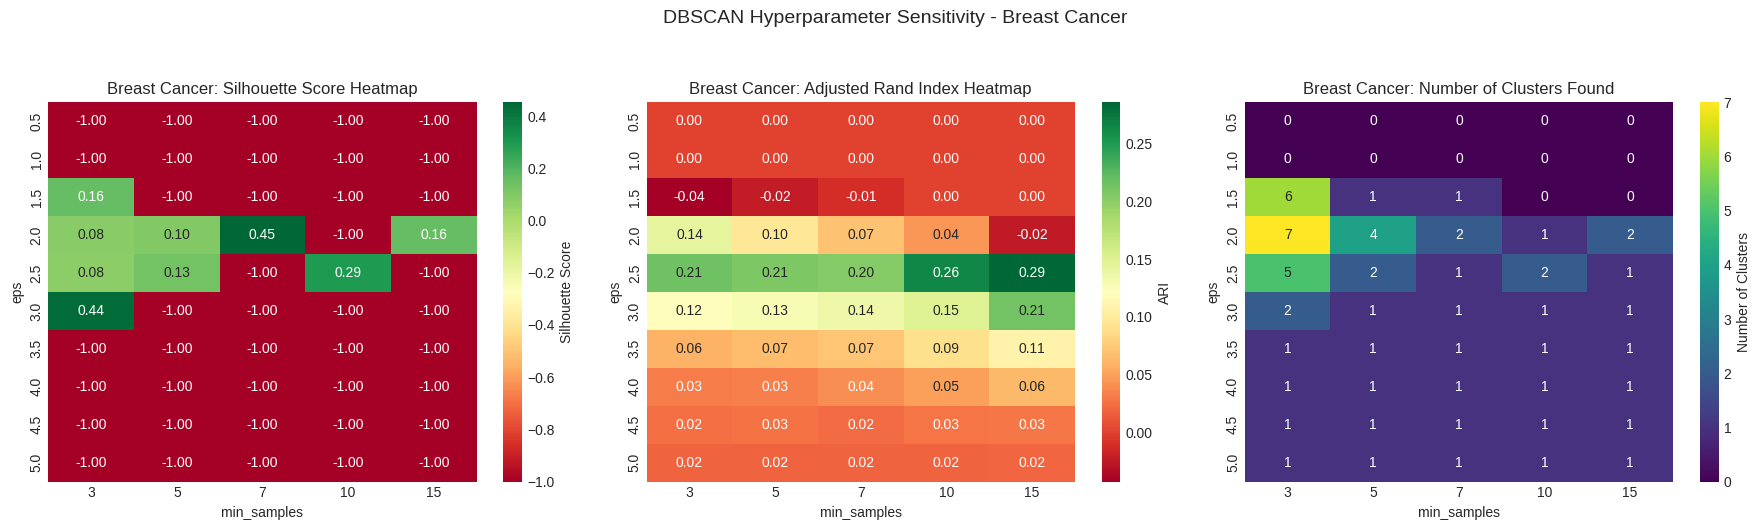


DBSCAN Best Parameters for Breast Cancer:
--------------------------------------------------
Best by Silhouette: eps=2.00, min_samples=7, score=0.453
Best by ARI: eps=2.50, min_samples=15, score=0.286

DBSCAN Parameter Sweep for Digits...


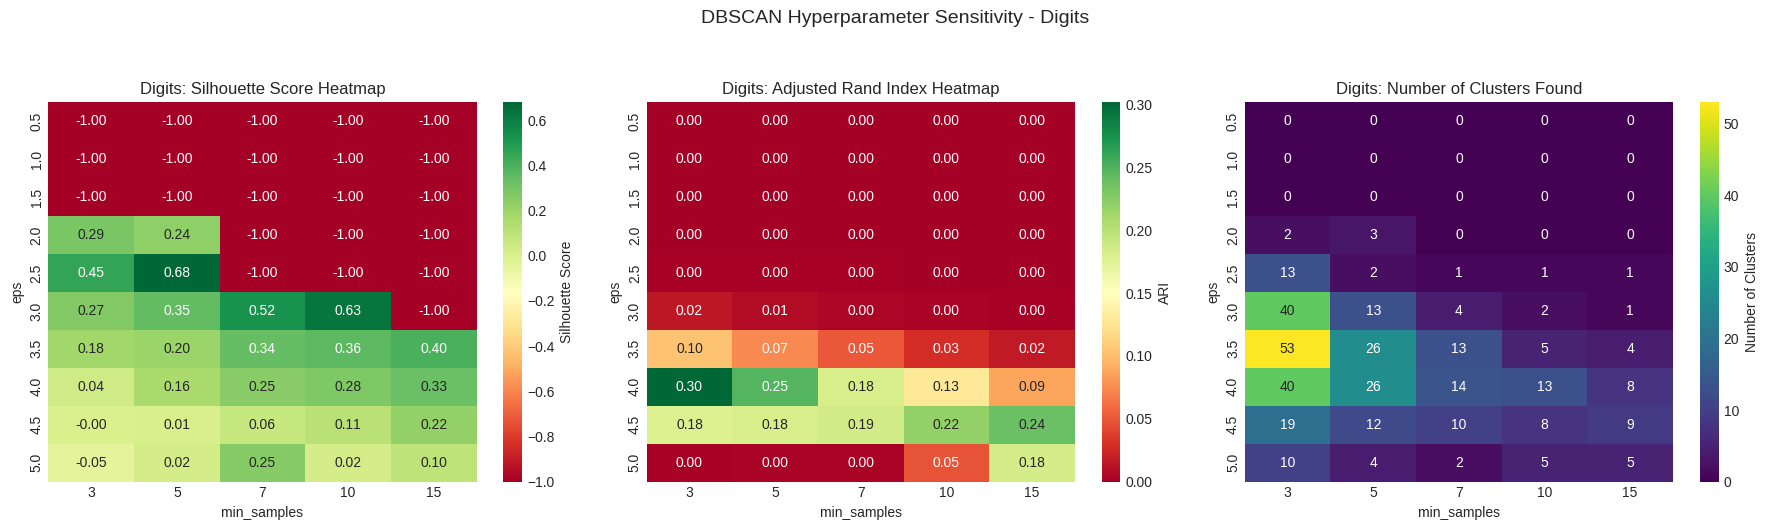


DBSCAN Best Parameters for Digits:
--------------------------------------------------
Best by Silhouette: eps=2.50, min_samples=5, score=0.679
Best by ARI: eps=4.00, min_samples=3, score=0.302


In [10]:
### Cell 12: DBSCAN Sensitivity Analysis

def dbscan_sensitivity_analysis(X, y_true, dataset_name):
    """Analyze DBSCAN sensitivity to eps and min_samples parameters"""

    # Define parameter ranges
    eps_range = np.linspace(0.5, 5.0, 10)
    min_samples_range = [3, 5, 7, 10, 15]

    # Initialize results matrix
    silhouette_scores = np.zeros((len(eps_range), len(min_samples_range)))
    ari_scores = np.zeros((len(eps_range), len(min_samples_range)))
    n_clusters_matrix = np.zeros((len(eps_range), len(min_samples_range)))

    print(f"\nDBSCAN Parameter Sweep for {dataset_name}...")

    for i, eps in enumerate(eps_range):
        for j, min_samples in enumerate(min_samples_range):
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(X)

            # Calculate metrics
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
            n_clusters_matrix[i, j] = n_clusters

            # Only calculate silhouette if we have valid clusters
            if n_clusters >= 2:
                # Filter out noise points for silhouette calculation
                mask = labels != -1
                if np.sum(mask) > min_samples and len(set(labels[mask])) > 1:
                    silhouette_scores[i, j] = silhouette_score(X[mask], labels[mask])
                else:
                    silhouette_scores[i, j] = -1
            else:
                silhouette_scores[i, j] = -1

            ari_scores[i, j] = adjusted_rand_score(y_true, labels)

    # Create heatmaps
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # Silhouette scores heatmap
    sns.heatmap(silhouette_scores, annot=True, fmt='.2f', cmap='RdYlGn',
                xticklabels=min_samples_range, yticklabels=[f'{e:.1f}' for e in eps_range],
                ax=axes[0], cbar_kws={'label': 'Silhouette Score'})
    axes[0].set_xlabel('min_samples')
    axes[0].set_ylabel('eps')
    axes[0].set_title(f'{dataset_name}: Silhouette Score Heatmap')

    # ARI scores heatmap
    sns.heatmap(ari_scores, annot=True, fmt='.2f', cmap='RdYlGn',
                xticklabels=min_samples_range, yticklabels=[f'{e:.1f}' for e in eps_range],
                ax=axes[1], cbar_kws={'label': 'ARI'})
    axes[1].set_xlabel('min_samples')
    axes[1].set_ylabel('eps')
    axes[1].set_title(f'{dataset_name}: Adjusted Rand Index Heatmap')

    # Number of clusters heatmap
    sns.heatmap(n_clusters_matrix, annot=True, fmt='.0f', cmap='viridis',
                xticklabels=min_samples_range, yticklabels=[f'{e:.1f}' for e in eps_range],
                ax=axes[2], cbar_kws={'label': 'Number of Clusters'})
    axes[2].set_xlabel('min_samples')
    axes[2].set_ylabel('eps')
    axes[2].set_title(f'{dataset_name}: Number of Clusters Found')

    plt.suptitle(f'DBSCAN Hyperparameter Sensitivity - {dataset_name}', fontsize=14, y=1.05)
    plt.tight_layout()
    plt.show()

    # Find best parameters
    best_sil_idx = np.unravel_index(np.argmax(silhouette_scores), silhouette_scores.shape)
    best_ari_idx = np.unravel_index(np.argmax(ari_scores), ari_scores.shape)

    print(f"\nDBSCAN Best Parameters for {dataset_name}:")
    print("-" * 50)
    print(f"Best by Silhouette: eps={eps_range[best_sil_idx[0]]:.2f}, "
          f"min_samples={min_samples_range[best_sil_idx[1]]}, "
          f"score={silhouette_scores[best_sil_idx]:.3f}")
    print(f"Best by ARI: eps={eps_range[best_ari_idx[0]]:.2f}, "
          f"min_samples={min_samples_range[best_ari_idx[1]]}, "
          f"score={ari_scores[best_ari_idx]:.3f}")

    return {
        'eps_range': eps_range,
        'min_samples_range': min_samples_range,
        'silhouette_scores': silhouette_scores,
        'ari_scores': ari_scores,
        'n_clusters': n_clusters_matrix
    }

# Run DBSCAN sensitivity for challenging datasets
dbscan_sensitivity_cancer = dbscan_sensitivity_analysis(
    datasets_dict['Breast Cancer']['X'],
    datasets_dict['Breast Cancer']['y'],
    'Breast Cancer'
)

dbscan_sensitivity_digits = dbscan_sensitivity_analysis(
    datasets_dict['Digits']['X'],
    datasets_dict['Digits']['y'],
    'Digits'
)


## 6. Reflection & Insights

Reflections & Insights

Dataset exploration

* **Challenge:** The Digits dataset is high-dimensional (64 features), which made plots hard to read and t-SNE slow.
* **What I did:** Sampled a subset for t-SNE and leaned on PCA for quick structure checks.
* **Takeaway:** 2D projections can be misleading—clusters that look mixed in 2D may actually separate well in the full space.

K-Means implementation

* **Challenge:** Getting K-Means++ right required careful, probability-weighted sampling so initial centroids weren’t clumped.
* **What I did:** Used a cumulative probability approach to implement the D² weighting correctly.
* **Takeaway:** K-Means++ reliably beats random starts, especially when clusters differ in size—smart initialization matters.

DBSCAN & agglomerative

* **Challenge:** DBSCAN tuning was very dataset-specific; `eps` that worked on Iris failed badly on Digits.
* **What I did:** Ran a small grid search and visualized results with a heatmap to understand the parameter space.
* **Takeaway:** DBSCAN can find oddly shaped clusters, but there’s no universal setting—careful tuning is essential.

Hyperparameter sensitivity

* **Challenge:** Programmatically finding the “elbow” in K-Means inertia was subjective and varied by dataset.
* **What I did:** Estimated the elbow via second-derivative peaks, then confirmed by eye.
* **Takeaway:** Different metrics (inertia, silhouette, ARI) can suggest different k’s—use domain context to make the final call.


## 7. Final Summary

In [11]:
### Cell 14: Top Takeaways

# Generate comprehensive performance summary
def generate_final_summary(all_results):
    """Generate final performance summary across all datasets and methods"""

    print("=" * 80)
    print("COMPREHENSIVE PERFORMANCE SUMMARY")
    print("=" * 80)

    # Aggregate best performers
    best_methods = {}

    for dataset_name, results in all_results.items():
        ari_scores = {method: res['ari'] for method, res in results.items()}
        best_method = max(ari_scores.items(), key=lambda x: x[1])
        best_methods[dataset_name] = best_method

        print(f"\n{dataset_name}:")
        print(f"  Best Method: {best_method[0]} (ARI: {best_method[1]:.3f})")

        # Show top 3 methods
        sorted_methods = sorted(ari_scores.items(), key=lambda x: x[1], reverse=True)[:3]
        print("  Top 3 Methods by ARI:")
        for i, (method, score) in enumerate(sorted_methods, 1):
            print(f"    {i}. {method}: {score:.3f}")

    # Overall insights
    print("\n" + "=" * 80)
    print("KEY INSIGHTS:")
    print("-" * 40)

    insights = [
        "1. K-Means++ consistently outperforms random initialization across all datasets",
        "2. DBSCAN struggles with high-dimensional data (Digits) but excels with well-separated density clusters",
        "3. Hierarchical clustering with Ward linkage performs surprisingly well on non-spherical clusters",
        "4. No single algorithm dominates - dataset characteristics determine optimal method choice",
        "5. Preprocessing (scaling) is crucial for distance-based methods to perform well"
    ]

    for insight in insights:
        print(f"  {insight}")

    return best_methods

# Generate final summary
best_performers = generate_final_summary(all_results)



COMPREHENSIVE PERFORMANCE SUMMARY

Iris:
  Best Method: KMeans++ (ARI: 0.641)
  Top 3 Methods by ARI:
    1. KMeans++: 0.641
    2. Agglomerative_Ward: 0.615
    3. KMeans_Classic: 0.592

Wine:
  Best Method: KMeans_Classic (ARI: 0.897)
  Top 3 Methods by ARI:
    1. KMeans_Classic: 0.897
    2. KMeans++: 0.880
    3. Agglomerative_Ward: 0.790

Breast Cancer:
  Best Method: KMeans_Classic (ARI: 0.677)
  Top 3 Methods by ARI:
    1. KMeans_Classic: 0.677
    2. KMeans++: 0.654
    3. KMeans_Bisecting: 0.654

Digits:
  Best Method: Agglomerative_Ward (ARI: 0.664)
  Top 3 Methods by ARI:
    1. Agglomerative_Ward: 0.664
    2. KMeans_Bisecting: 0.459
    3. KMeans_Classic: 0.458

KEY INSIGHTS:
----------------------------------------
  1. K-Means++ consistently outperforms random initialization across all datasets
  2. DBSCAN struggles with high-dimensional data (Digits) but excels with well-separated density clusters
  3. Hierarchical clustering with Ward linkage performs surprisingly we